In [5]:
import networkx as nx
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
import warnings
warnings.filterwarnings("ignore")

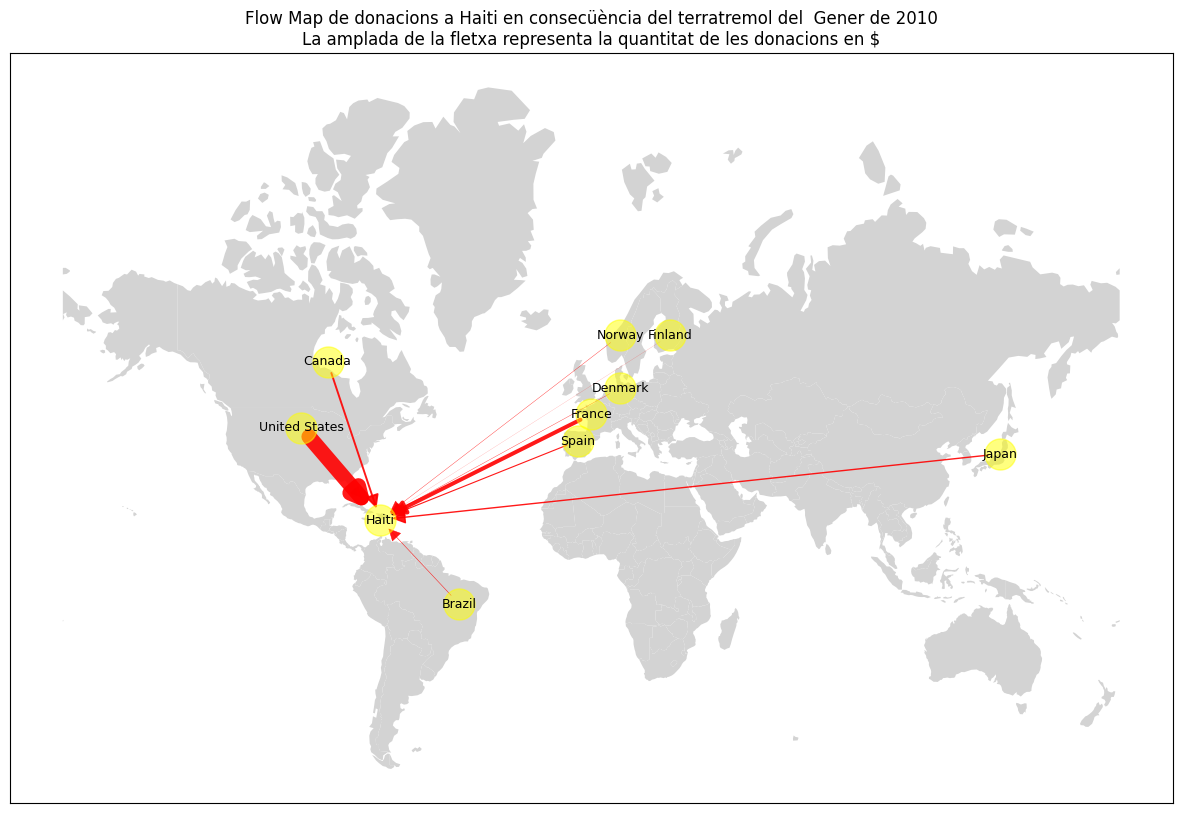

In [104]:
#Carrega les dades (inspirades en https://informationisbeautiful.net/2010/haiti-earthquake-whos-given-what/)
donation_data = pd.DataFrame({
    'target': ['Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti', 'Haiti'],
    'source': ['Norway', 'Denmark', 'Canada', 'United States', 'Finland', 'Spain', 'Brazil', 'Japan', 'France'],
    'value': [26724483, 25690336, 137792229, 1093211627, 8241961, 81259252, 36679276, 100527154, 288057248]
})


nodes_data = pd.DataFrame({
    'name': pd.unique(donation_data[['source', 'target']].values.ravel('K')),
    'group': 1
})

# Crea un graf dirigit
G = nx.DiGraph()

# Afegeix els nodes i costats al graf
for index, row in donation_data.iterrows():
    G.add_edge(row['source'], row['target'], weight=row['value'])

# Descarregar el dataset del mapa mundial de "Natural Earth" (110m scale)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est > 0) & (world.name != "Antarctica")]

# Projectar les geometries
world = world.to_crs(epsg=3395)

# Establiment de les coordenades dels països
manual_coordinates = {
    'Norway': (1100000, 9000000),
    'Denmark': (1100000, 7000000),
    'Canada': (-10000000, 8000000),
    'United States': (-11000000, 5500000),
    'Finland': (3000000, 9000000),
    'Spain': (-500000, 5000000),
    'Brazil': (-5000000, -1200000),
    'Japan': (15500000, 4500000),
    'France': (0, 6000000),
    'Haiti': (-8000000, 2000000)}

# Dibuixa el mapa
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')

# Dibuixa els nodes al mapa
pos = {country: manual_coordinates.get(country, (0, 0))  # Use manual coordinates if available, else (0, 0)
       for country in G.nodes}
pos = {country: tuple(coord) for country, coord in pos.items()}  # Convert to tuples
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='yellow', alpha=0.5)

# Mostra els costats en el mapa amb la ampladad de la fletxa representant els diners en $
edge_widths = [G[u][v]['weight'] / 100000000 for u, v in G.edges]
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.9, edge_color='red', arrowsize=20)

# Anotar els nodes
node_labels = {country: country for country in G.nodes}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=9, font_color='black')

plt.title('Flow Map de donacions a Haiti en consecüència del terratremol del  Gener de 2010\nLa amplada de la fletxa representa la quantitat de les donacions en $')

plt.show()